In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path = r'C:\Users\saumy\OneDrive\Documents\Desktop\F1-PREDICTION-\F1 Data 2013 - 2014.xlsx' 

# Load each sheet into a separate DataFrame
race_data = pd.read_excel(file_path, sheet_name='Race')
pitstop_data = pd.read_excel(file_path, sheet_name='Pitstop')

# Display the first few rows of each DataFrame to understand the structure
print("Race Data:")
print(race_data.head())

print("\nPitstop Data:")
print(pitstop_data.head())

Race Data:
   Year                                  Grandprix Pos  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia   1   7   Räikkönen   
1  2013  Albert Park Grand Prix Circuit, Australia   2   3      Alonso   
2  2013  Albert Park Grand Prix Circuit, Australia   3   1      Vettel   
3  2013  Albert Park Grand Prix Circuit, Australia   4   4       Massa   
4  2013  Albert Park Grand Prix Circuit, Australia   5  10    Hamilton   

                       Car  Laps Time/retired   Pts  Status  
0            Lotus Renault  58.0     0.062537  25.0       0  
1                  Ferrari  58.0     +12.451s  18.0       1  
2  Red Bull Racing Renault  58.0     +22.346s  15.0       0  
3                  Ferrari  58.0     +33.577s  12.0       0  
4                 Mercedes  58.0     +45.561s  10.0       1  

Pitstop Data:
   Year                                  Grandprix  Stops  No      Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia      1   5      Button   
1  

In [15]:
# Calculate the number of years each driver has been active
driver_experience = race_data.groupby('Driver')['Year'].nunique().reset_index()
driver_experience.columns = ['Driver', 'Years_Active']

# Merge this back into the race data
race_data = pd.merge(race_data, driver_experience, on='Driver', how='left')

# Check the new feature
print(race_data[['Driver', 'Years_Active']].head())

      Driver  Years_Active
0     Alonso            10
1   Hamilton            12
2      Perez            12
3     Bottas            12
4   Hamilton            12


In [3]:
# Handle missing values
race_data['Laps'].fillna(race_data['Laps'].mean(), inplace=True)
pitstop_data.dropna(inplace=True)

# Convert 'Pos' to an integer
race_data['Pos'] = pd.to_numeric(race_data['Pos'], errors='coerce')
race_data.dropna(subset=['Pos'], inplace=True)
race_data['Pos'] = race_data['Pos'].astype(int)

# Filter out drivers with status 0 (not active)
race_data = race_data[race_data['Status'] == 1]

In [4]:
# Calculate yearly average finishing positions for each driver
driver_yearly_performance = race_data.groupby(['Year', 'Driver'])['Pos'].mean().reset_index()

# Calculate yearly average points for each team
team_yearly_points = race_data.groupby(['Year', 'Car'])['Pts'].mean().reset_index()

# Calculate cumulative points for each driver over the years
driver_cumulative_points = race_data.groupby(['Driver', 'Year'])['Pts'].sum().groupby(level=0).cumsum().reset_index()

# Display the aggregated data
print(driver_yearly_performance.head())
print(team_yearly_points.head())
print(driver_cumulative_points.head())

   Year       Driver        Pos
0  2013       Alonso   4.055556
1  2013       Bottas  13.705882
2  2013     Hamilton   5.166667
3  2013   Hulkenberg  10.058824
4  2013        Perez  10.157895
   Year               Car        Pts
0  2013           Ferrari  13.444444
1  2013  McLaren Mercedes   2.578947
2  2013          Mercedes  10.500000
3  2013       STR Ferrari   1.250000
4  2013    Sauber Ferrari   3.000000
   Driver  Year    Pts
0   Zhou   2022    6.0
1   Zhou   2023   12.0
2   Zhou   2024   12.0
3   Albon  2019   92.0
4   Albon  2020  197.0


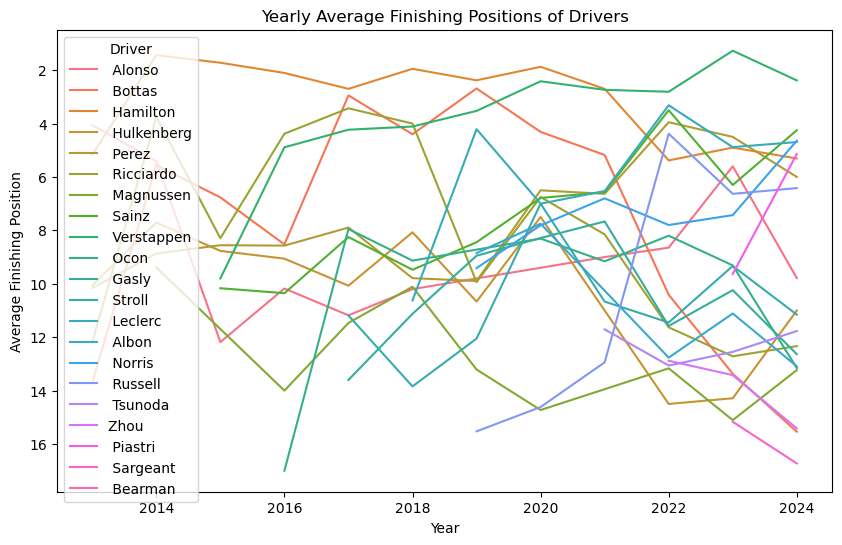

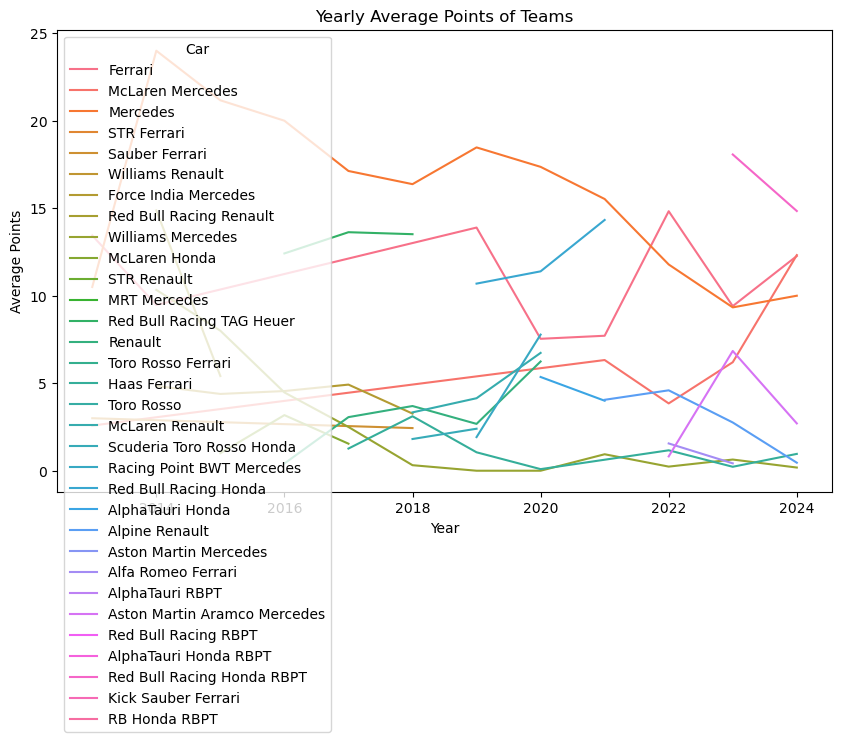

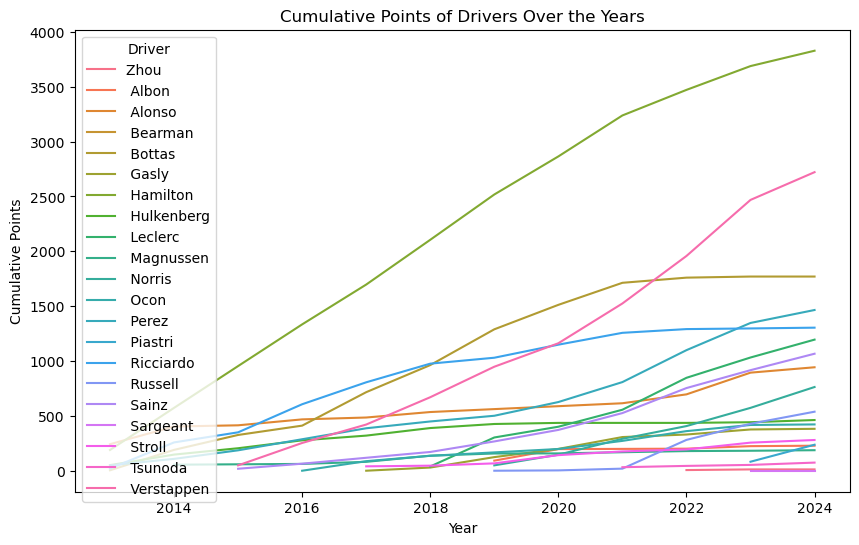

In [5]:
# Trend of average finishing positions for a specific driver over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_yearly_performance, x='Year', y='Pos', hue='Driver')
plt.title('Yearly Average Finishing Positions of Drivers')
plt.xlabel('Year')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis because lower positions are better
plt.legend(title='Driver')
plt.show()

# Trend of average points for teams over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_yearly_points, x='Year', y='Pts', hue='Car')
plt.title('Yearly Average Points of Teams')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.show()

# Cumulative points for a specific driver over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_cumulative_points, x='Year', y='Pts', hue='Driver')
plt.title('Cumulative Points of Drivers Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Points')
plt.show()

In [7]:
# Calculate the average pit stop time for each driver across all races
avg_pitstop_time = pitstop_data.groupby('Driver')['Total'].mean().reset_index()
avg_pitstop_time.columns = ['Driver', 'Avg_Pitstop_Time']

# Merge this information back into the race_data
race_data = pd.merge(race_data, avg_pitstop_time, on='Driver', how='left')

# Now check if the column exists
print(race_data.head())

   Year                                  Grandprix  Pos  No     Driver  \
0  2013  Albert Park Grand Prix Circuit, Australia    2   3     Alonso   
1  2013  Albert Park Grand Prix Circuit, Australia    5  10   Hamilton   
2  2013  Albert Park Grand Prix Circuit, Australia   11   6      Perez   
3  2013  Albert Park Grand Prix Circuit, Australia   14  17     Bottas   
4  2013     Sepang International Circuit, Malaysia    3  10   Hamilton   

                Car  Laps Time/retired   Pts  Status  Avg_Pitstop_Time  
0           Ferrari  58.0     +12.451s  18.0       1         24.929722  
1          Mercedes  58.0     +45.561s  10.0       1         25.363117  
2  McLaren Mercedes  58.0     +83.367s   0.0       1         24.965517  
3  Williams Renault  57.0       +1 lap   0.0       1         25.113229  
4          Mercedes  56.0     +12.181s  15.0       1         25.363117  


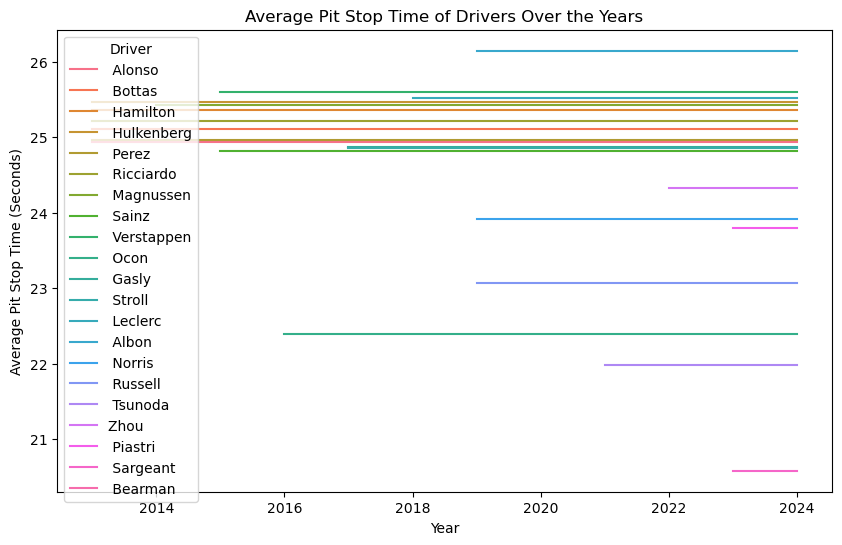

In [8]:
# Analyzing the impact of average pit stop time on finishing position over the years
driver_pitstop_trend = race_data.groupby(['Year', 'Driver'])['Avg_Pitstop_Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_pitstop_trend, x='Year', y='Avg_Pitstop_Time', hue='Driver')
plt.title('Average Pit Stop Time of Drivers Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Pit Stop Time (Seconds)')
plt.show()

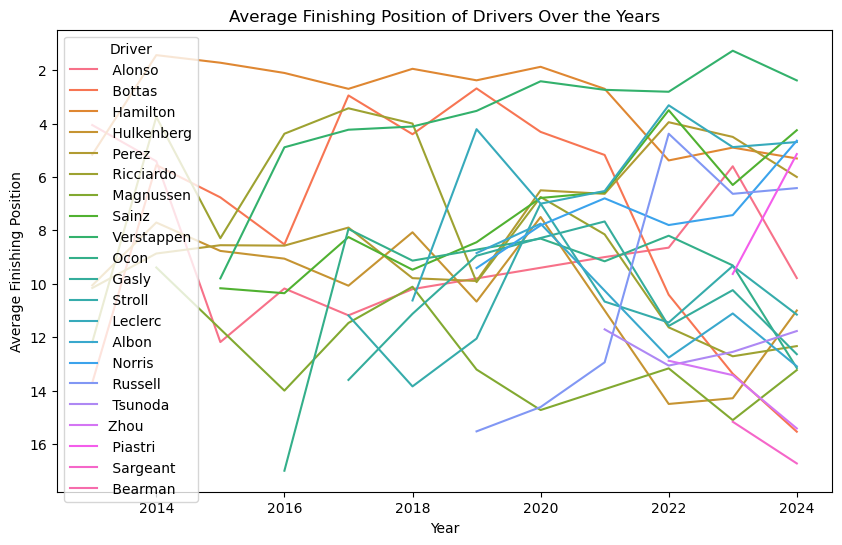

In [9]:
# Calculate the average finishing position for each driver over the years
driver_performance_trend = race_data.groupby(['Year', 'Driver'])['Pos'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_performance_trend, x='Year', y='Pos', hue='Driver')
plt.title('Average Finishing Position of Drivers Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis since lower positions are better
plt.show()

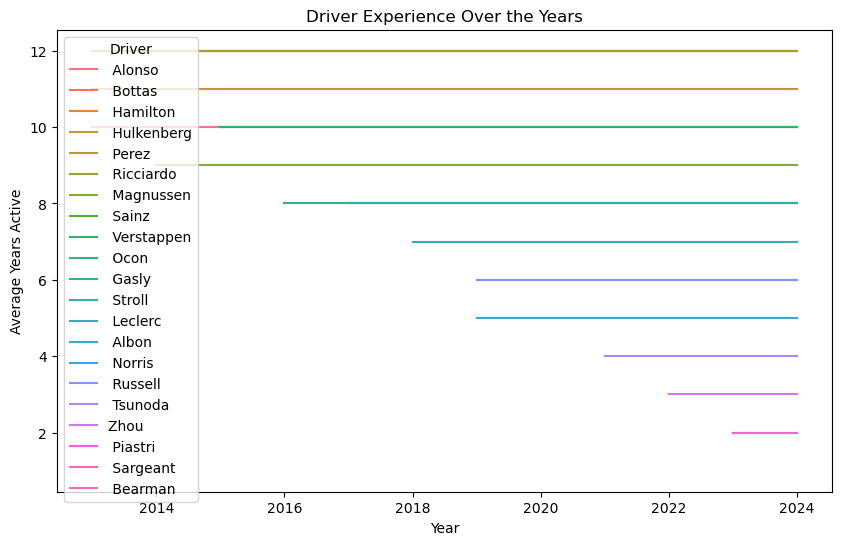

In [16]:
# Calculate the trend of driver experience over the years
driver_experience_trend = race_data.groupby(['Year', 'Driver'])[['Years_Active']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_experience_trend, x='Year', y='Years_Active', hue='Driver')
plt.title('Driver Experience Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Years Active')
plt.show()

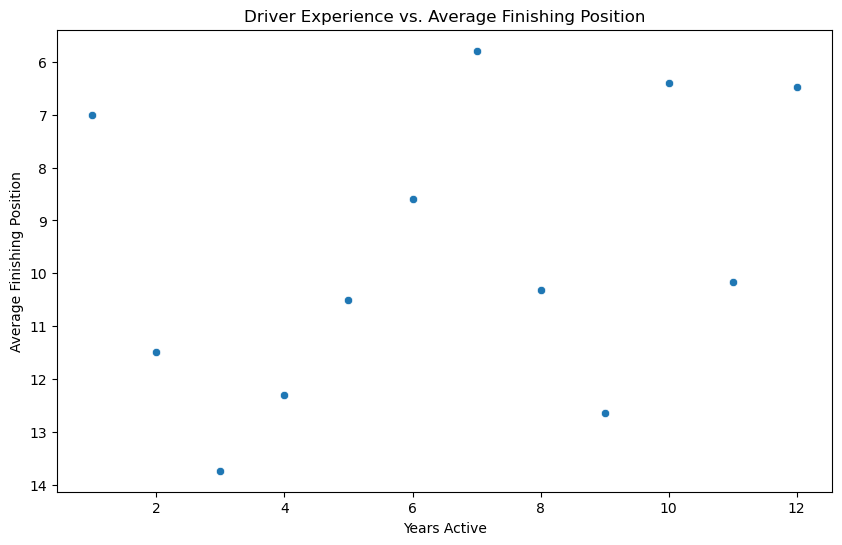

In [17]:
# Analyze correlation between experience and finishing position
driver_experience_position = race_data.groupby(['Years_Active'])['Pos'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=driver_experience_position, x='Years_Active', y='Pos')
plt.title('Driver Experience vs. Average Finishing Position')
plt.xlabel('Years Active')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis since lower positions are better
plt.show()

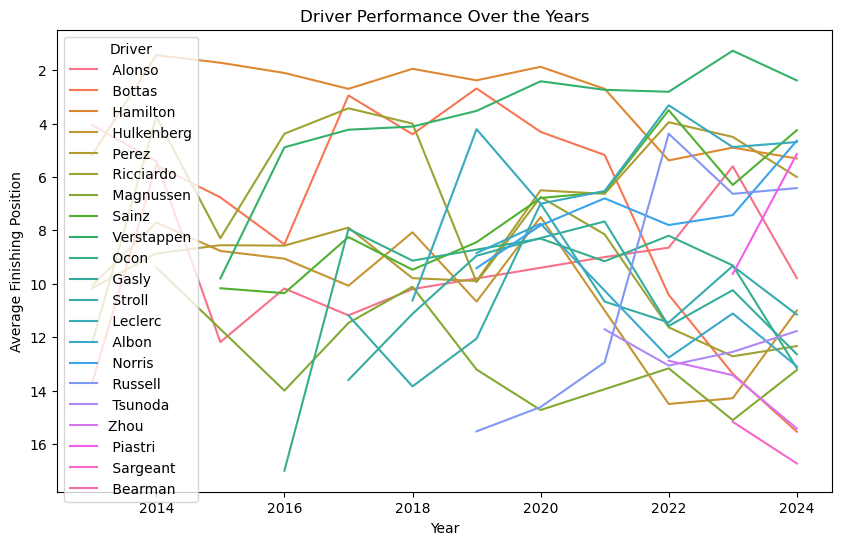

In [18]:
# Analyze driver performance (finishing position) over the years
driver_performance_trend = race_data.groupby(['Year', 'Driver'])['Pos'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=driver_performance_trend, x='Year', y='Pos', hue='Driver')
plt.title('Driver Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis since lower positions are better
plt.show()